In [1]:
import plotly.express as px
import pandas as pd
from tqdm import tqdm

from pyubx2 import UBXReader

In [162]:
fn = "2023_02_24_22_21_58.ubx"

fn = "test_traces/"+fn

msgs = []
with open(fn, "rb") as stream:
    ubr = UBXReader(stream, protfilter=2)
    for x in tqdm(ubr):
        msgs.append(x[1])

print(len(msgs))

6985it [00:06, 1149.71it/s]

6985


In [164]:
set([x.identity for x in msgs])

{'NAV-PVT', 'RXM-RAWX', 'RXM-SFRBX'}

In [165]:
out = []
out += [{"timestamp": x.hour*60*60 + x.min*60 + x.second + x.nano*1e-9,
         "rtktype": x.carrSoln,
         "latitude": x.lat,
         "longitude": x.lon,
         "ground_speed": x.gSpeed*0.00223694, # mph
         "altitude": x.hMSL / 1000, # meters
         "horizontal_accuracy": x.hAcc / 1000,
         "vertical_accuracy": x.vAcc / 1000,
         "speed_accuracy": x.sAcc*0.00223694
        } for x in msgs if x.identity=="NAV-PVT" and x.carrSoln in (1, 2)]

df = pd.DataFrame.from_dict(out)

In [166]:
df

,timestamp,rtktype,latitude,longitude,ground_speed,altitude,horizontal_accuracy,vertical_accuracy,speed_accuracy
0,12140.199757,1,40.442889,-79.942778,0.026843,289.015,1.085,0.762,0.138690
1,12140.299757,1,40.442888,-79.942779,0.029080,288.910,0.750,0.594,0.176718
2,12140.399757,1,40.442888,-79.942780,0.035791,288.846,0.609,0.515,0.136453
3,12140.499757,1,40.442888,-79.942780,0.029080,288.796,0.527,0.466,0.140927
4,12140.599757,1,40.442888,-79.942780,0.044739,288.762,0.471,0.431,0.140927
...,...,...,...,...,...,...,...,...,...
1337,12281.999761,2,40.442838,-79.942835,0.355673,289.397,0.014,0.010,0.147638
1338,12282.099761,2,40.442838,-79.942835,0.389228,289.453,0.014,0.010,0.140927
1339,12282.249761,2,40.442838,-79.942835,1.033466,289.488,0.014,0.012,0.140927
1340,12282.349761,2,40.442838,-79.942835,0.823194,289.476,0.014,0.012,0.145401


In [167]:
df.to_csv(fn.replace(".ubx", ".csv"))

In [168]:
ll = list(df["timestamp"])
oo = []
for i in range(len(ll)-1):
    oo.append(round(ll[i+1]-ll[i], 2))
    
print({x: oo.count(x) for x in set(oo)})

{0.1: 1283, 1.1: 1, 2.2: 1, 0.3: 1, 0.15: 49, 0.2: 5, 2.0: 1}


In [169]:
layers = [
    {
        "below": "traces",
        "sourcetype": "raster",
        "source": [
            "https://imagery.pasda.psu.edu/arcgis/rest/services/pasda/PEMAImagery2018_2020/MapServer/WMTS/tile/1.0.0/pasda_PEMAImagery2018_2020/default/default028mm/{z}/{y}/{x}.png"
        ]
    }
]

fig = px.scatter_mapbox(df,
                        lat="latitude", lon="longitude",
                        color="ground_speed",
                        hover_data=["horizontal_accuracy",
                                    "speed_accuracy",
                                    "altitude",
                                    "timestamp"],
                        zoom=15, size_max=18,
                        height=400, width=800)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=layers
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [146]:
fig.write_html(fn.replace(".ubx", ".html"))

In [147]:
import shutil

In [148]:
print(fn)

test_traces/2023_02_24_13_55_50.ubx


In [149]:
name = "pvtonly" + "_" + "scooter_northoakland"
oo = fn.replace("test_traces/", "test_traces/out1/").replace(".ubx", "")+"_"+name
shutil.copy(fn, oo+".ubx")
df.to_csv(oo+".csv")
fig.write_html(oo+".html")

In [33]:
import seaborn as sns

<AxesSubplot:xlabel='timestamp', ylabel='fixtype'>

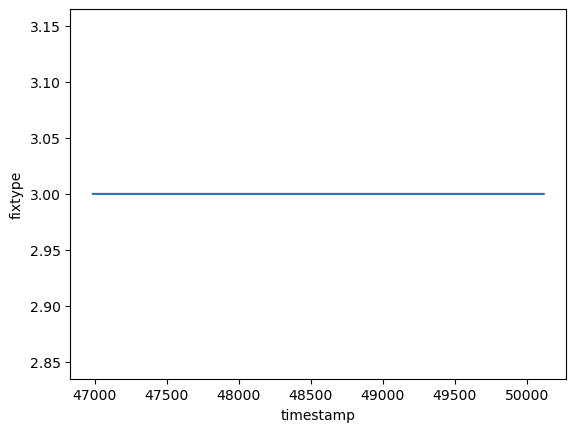

In [43]:
sns.lineplot(data=df, x="timestamp", y="fixtype")